# Exploratory Data Analysis

## Import libraries

In [2]:
import numpy as np
import awkward as ak
import uproot
import vector
vector.register_awkward()

#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import os
#import shutil
#import zipfile
#import tarfile
#import urllib
import requests
from tqdm import tqdm

import time

In [3]:
def _download(url, fname, chunk_size=4096):
    '''https://gist.github.com/yanqd0/c13ed29e29432e3cf3e7c38467f42f51'''
    resp = requests.get(url, stream=True)
    total = int(resp.headers.get('content-length', 0))
    with open(fname, 'wb') as file, tqdm(
        desc=fname,
        total=total,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in resp.iter_content(chunk_size=chunk_size):
            size = file.write(data)
            bar.update(size)

In [4]:
# Download the example file
example_file = 'JetClass_example_100k.root'
if not os.path.exists(example_file):
    _download('https://hqu.web.cern.ch/datasets/JetClass/example/JetClass_example_100k.root', example_file)

## Exploring the file

In [5]:
# Load the content from the file
tree = uproot.open(example_file)['tree']

In [6]:
# Display the content of the "tree"
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
part_px              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_py              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_pz              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_energy          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_deta            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_dphi            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_d0val           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_d0err           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_dzval           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_dzerr           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
part_charge          | std::

In [7]:
dir(tree)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_bases',
 '_chunk',
 '_concrete',
 '_cursor',
 '_deeply_writable',
 '_file',
 '_instance_version',
 '_ipython_key_completions_',
 '_is_memberwise',
 '_lookup',
 '_members',
 '_num_bytes',
 '_parent',
 '_serialize',
 '_to_writable',
 '_to_writable_postprocess',
 'aliases',
 'all_members',
 'arrays',
 'awkward_form',
 'base',
 'base_names_versions',
 'bases',
 'behaviors',
 'branches',
 'cache_key',
 'check_numbytes'

In [8]:
tree.num_entries 

100000

In [18]:
# Load all arrays in the tree
# Each array is a column of the table
table = tree.arrays()

In [19]:
table.show()

[{part_px: [-125, -91.1, ..., -1.14], part_py: [64.3, ...], part_pz: ..., ...},
 {part_px: [110, 27.9, ..., -0.189, 0.225], part_py: [219, ...], ...},
 {part_px: [129, 81.7, ..., 0.771, 0.616], part_py: [-63, ...], ...},
 {part_px: [91.2, 83.4, ..., 1.04, 0.698], part_py: [-128, ...], ...},
 {part_px: [-168, -52.9, ..., -0.473], part_py: [159, ...], part_pz: ..., ...},
 {part_px: [210, 145, ..., 0.976, 0.738], part_py: [...], part_pz: [...], ...},
 {part_px: [24.4, 36, ..., 0.633, 0.747], part_py: [63.8, ...], ...},
 {part_px: [-53.2, -45.9, ..., -0.674], part_py: [66, ...], part_pz: ..., ...},
 {part_px: [47.9, 40.8, ..., 1.14, 0.859], part_py: [...], part_pz: [...], ...},
 {part_px: [-49.4, -15.8, ..., -0.983], part_py: [-274, ...], ...},
 ...,
 {part_px: [-214, -138, ..., -1.71, -1.43], part_py: [...], part_pz: ..., ...},
 {part_px: [6.1, 3.21, ..., -0.0376], part_py: [155, ...], part_pz: [...], ...},
 {part_px: [-70.7, -54.7, ..., -0.442], part_py: [-78, ...], part_pz: ..., ...},
 

In [20]:
type(table[0])

awkward.highlevel.Record

In [21]:
type(table)

awkward.highlevel.Array

In [22]:
# Each element in table is a jet
len(table)

100000

In [12]:
table[0]

<Record {part_px: [-125, ...], ...} type='{part_px: var * float32, part_py:...'>

In [13]:
# Number of particles in the jet
len(table[0]['part_px']), len(table[0]['part_py']), len(table[0]['part_pz'])

(38, 38, 38)

In [14]:
# Number of particles must be consistent in all measures
len(table[0]['part_deta']), len(table[0]['part_dphi'])

(38, 38)

In [15]:
table[0]['jet_nparticles']

38.0

In [ ]:
'''    
    jet_pt: float32,
    jet_eta: float32,
    jet_phi: float32,
    jet_energy: float32,
    jet_nparticles: float32,
    jet_sdmass: float32,
    jet_tau1: float32,
    jet_tau2: float32,
    jet_tau3: float32,
    jet_tau4: float32,
    aux_genpart_eta: float32,
    aux_genpart_phi: float32,
    aux_genpart_pid: float32,
    aux_genpart_pt: float32,
    aux_truth_match: float32
'''
table[0]['aux_genpart_pid']

25.0

table contiene 100000 registros, cada registro es un jet. 
Cada jet tiene unas features o información que lo caracteriza. Cada jet tiene un número diferente de partículas. 

En el caso del primer jet table[0], contiene 38 partículas y cada partícula tiene información de momento espacial por lo que 

len(table[0]['part_px']) = len(table[0]['part_py']) = len(table[0]['part_pz']) = table[0]['jet_nparticles'] = 38

In [17]:
len(table)

100000

## Define labels field

In [23]:
table[0][[ 'label_H4q',
           'label_Hbb',
           'label_Hcc',
           'label_Hgg',
           'label_Hqql',
           'label_QCD',
           'label_Tbl',
           'label_Tbqq',
           'label_Wqq',
           'label_Zqq']].tolist()

{'label_H4q': False,
 'label_Hbb': True,
 'label_Hcc': False,
 'label_Hgg': False,
 'label_Hqql': False,
 'label_QCD': 0.0,
 'label_Tbl': 0,
 'label_Tbqq': 0,
 'label_Wqq': 0,
 'label_Zqq': 0}

In [24]:
start_time = time.time()
labels_list = []
for i in range(len(table)):

    dict_labels = table[i][[ 'label_H4q',
                             'label_Hbb',
                             'label_Hcc',
                             'label_Hgg',
                             'label_Hqql',
                             'label_QCD',
                             'label_Tbl',
                             'label_Tbqq',
                             'label_Wqq',
                             'label_Zqq']].tolist()

    for clave in dict_labels:
        # Convierte el valor actual a entero
        dict_labels[clave] = int(dict_labels[clave])

    clave_maxima = max(dict_labels, key=lambda k: dict_labels[k])
    
    labels_list.append(clave_maxima)
    
print('Done!')
print('Execution time: {} seconds'.format(time.time() - start_time))

Done!
Execution time: 11.041341781616211 seconds


In [ ]:
list(np.unique(labels_list))

['label_H4q',
 'label_Hbb',
 'label_Hcc',
 'label_Hgg',
 'label_Hqql',
 'label_QCD',
 'label_Tbl',
 'label_Tbqq',
 'label_Wqq',
 'label_Zqq']

In [26]:
len(labels_list)

100000

In [27]:
table['labels'] = labels_list

In [28]:
table['labels'] 

<Array ['label_Hbb', 'label_Hbb', ..., 'label_Zqq'] type='100000 * string'>

In [29]:
table.fields

['part_px',
 'part_py',
 'part_pz',
 'part_energy',
 'part_deta',
 'part_dphi',
 'part_d0val',
 'part_d0err',
 'part_dzval',
 'part_dzerr',
 'part_charge',
 'part_isChargedHadron',
 'part_isNeutralHadron',
 'part_isPhoton',
 'part_isElectron',
 'part_isMuon',
 'label_QCD',
 'label_Hbb',
 'label_Hcc',
 'label_Hgg',
 'label_H4q',
 'label_Hqql',
 'label_Zqq',
 'label_Wqq',
 'label_Tbqq',
 'label_Tbl',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_energy',
 'jet_nparticles',
 'jet_sdmass',
 'jet_tau1',
 'jet_tau2',
 'jet_tau3',
 'jet_tau4',
 'aux_genpart_eta',
 'aux_genpart_phi',
 'aux_genpart_pid',
 'aux_genpart_pt',
 'aux_truth_match',
 'labels']

## Create plot functions

In [30]:
# Graficar para cada etiqueta en un subgráfico separado
unique_labels = list(np.unique(labels_list))

In [31]:
unique_labels

['label_H4q',
 'label_Hbb',
 'label_Hcc',
 'label_Hgg',
 'label_Hqql',
 'label_QCD',
 'label_Tbl',
 'label_Tbqq',
 'label_Wqq',
 'label_Zqq']

In [32]:
type(table['labels'])

awkward.highlevel.Array

### Plot histograms separately

In [33]:
def plot_histograms(input_features):

    # Obtener las variables relevantes
    part_feat= table[input_features]
    labels = table["labels"] ## Must be in type awkward.highlevel.Array

    num_subplots = len(unique_labels)
    fig, axs = plt.subplots(num_subplots, figsize=(5, 3*num_subplots))

    for i, label in enumerate(unique_labels):
        mask = labels == label
        axs[i].hist(part_feat[mask], bins=100 )
        axs[i].set_xlabel('{}'.format(input_features))
        axs[i].set_ylabel('count')
        axs[i].set_title(f'{input_features} histogram for {label}')
        axs[i].legend([label])

    plt.tight_layout()
    plt.show()

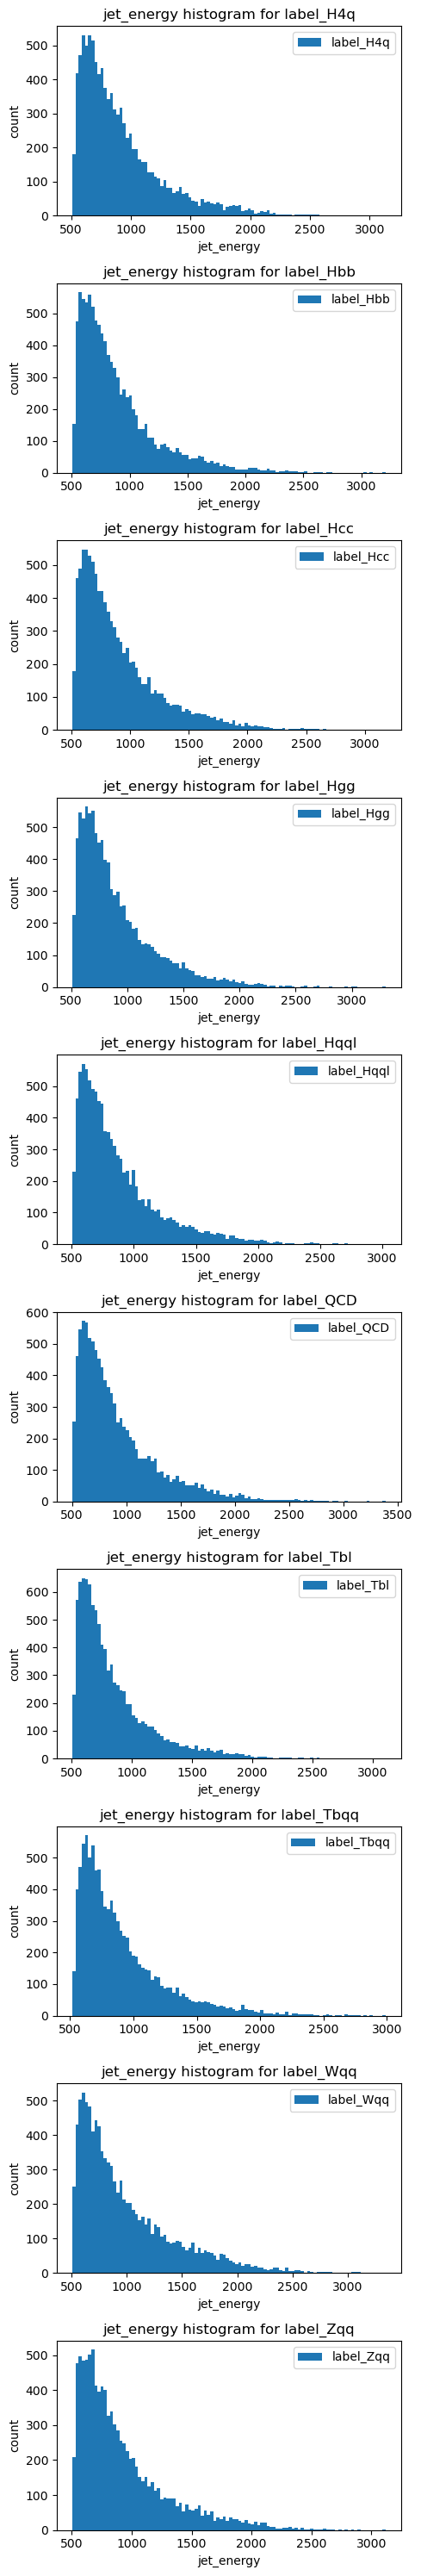

In [34]:
plot_histograms("jet_energy")

### Plot histograms for comparison

In [35]:
def hist_feature_comparison(feature):

    jet_feat = table[feature]
    labels = table["labels"]
    
    for i, label in enumerate(unique_labels):
        mask = labels == label
        #print(jet_feat[mask])
        plt.hist(jet_feat[mask], bins=100 , alpha = 0.5, label = {label} )

    plt.xlabel('{}'.format(feature))
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(feature))
    plt.legend()

    plt.tight_layout()
    plt.show()

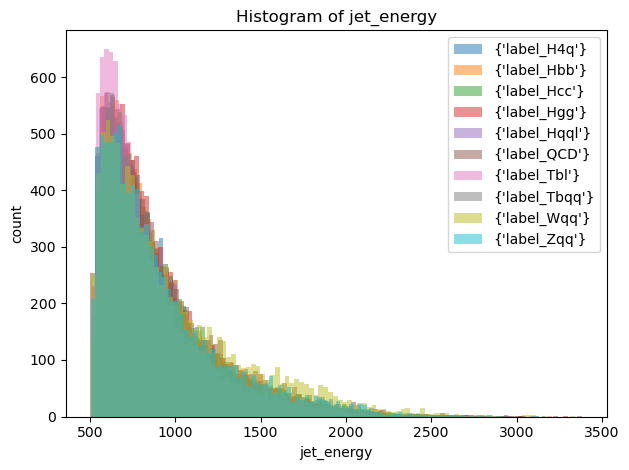

In [36]:
hist_feature_comparison('jet_energy')

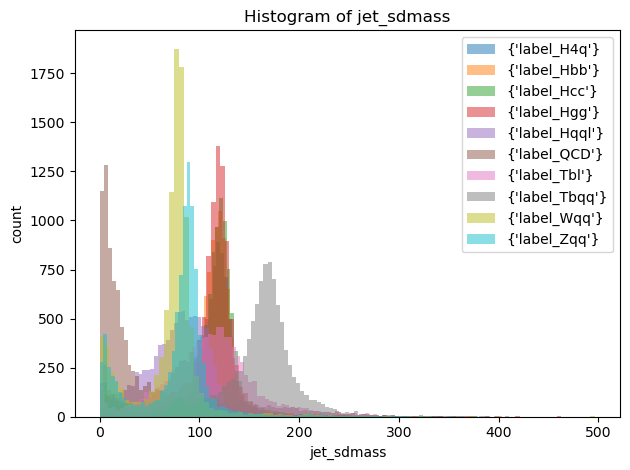

In [37]:
hist_feature_comparison('jet_sdmass')

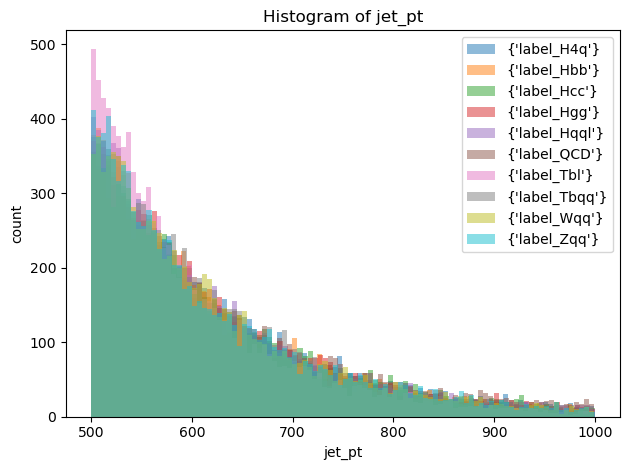

In [38]:
hist_feature_comparison('jet_pt')

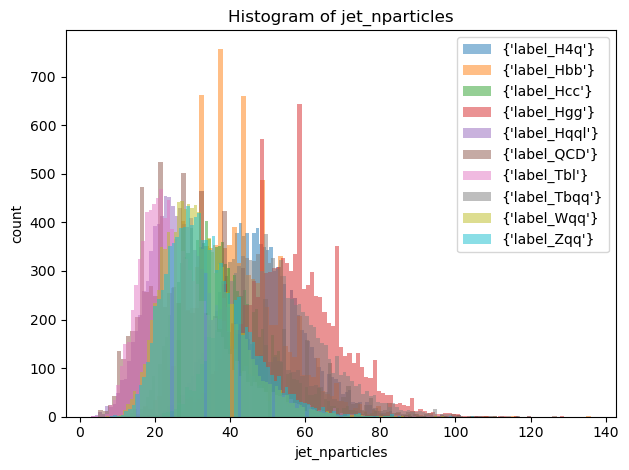

In [39]:
hist_feature_comparison('jet_nparticles')

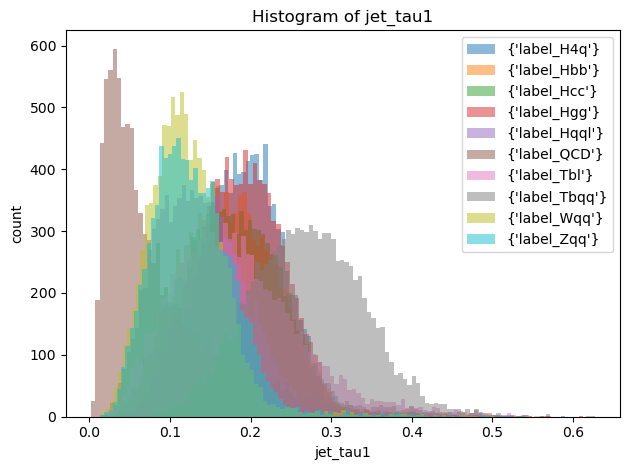

In [40]:
hist_feature_comparison('jet_tau1')

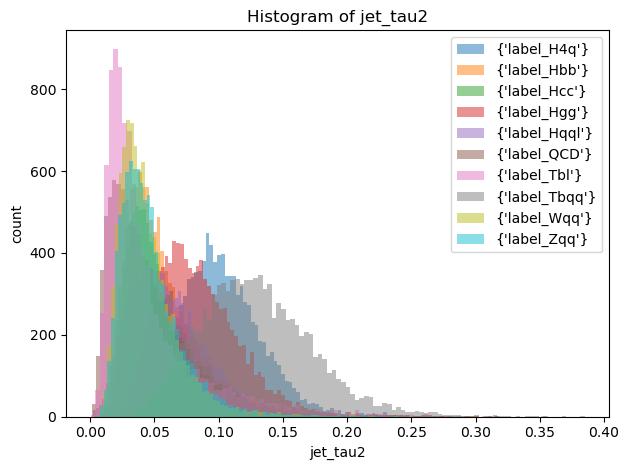

In [41]:
hist_feature_comparison('jet_tau2')

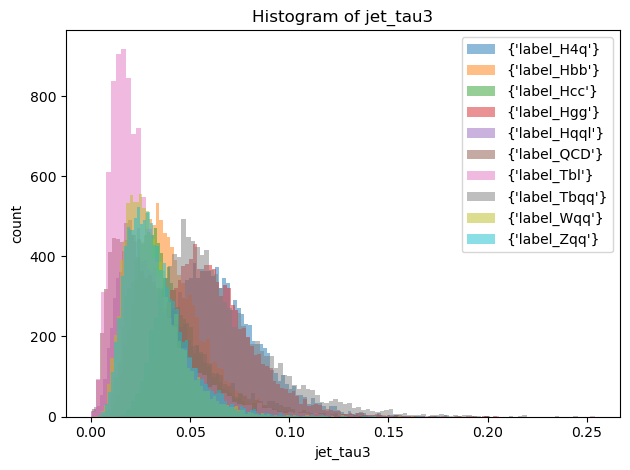

In [42]:
hist_feature_comparison('jet_tau3')

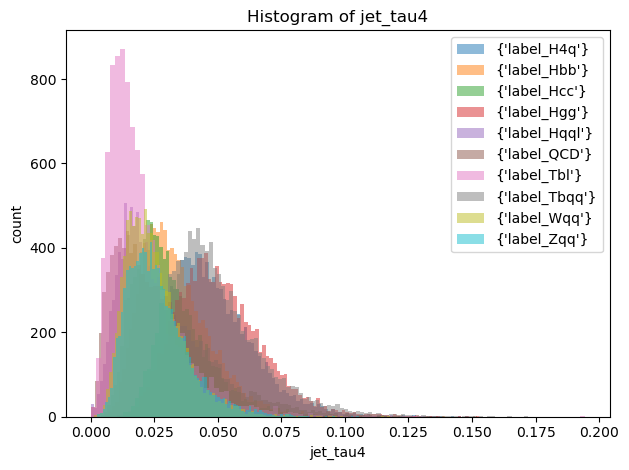

In [43]:
hist_feature_comparison('jet_tau4')

In [44]:
len(table[len(table)-1]['part_px']), len(table[len(table)-1]['part_py']), len(table[len(table)-1]['part_pz'])

(42, 42, 42)

In [45]:
# Arrays of a scalar type (bool/int/float) can be converted to a numpy array directly, e.g.
table['label_QCD'].to_numpy()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [46]:
# Arrays of a vector type are loaded as a JaggedArray that has varying elements per row
table['part_px']

# A JaggedArray can be (zero-) padded to become a regular numpy array (see later)

<Array [[-125, -91.1, ..., -1.19, -1.14], ...] type='100000 * var * float32'>

In [47]:
# Construct a Lorentz 4-vector from the (px, py, pz, energy) arrays
p4 = vector.zip({'px': table['part_px'], 'py': table['part_py'], 'pz': table['part_pz'], 'energy': table['part_energy']})

Acá ya es un objeto que contiene el 4-momentum para cada particula, vectorizado. cada corchete es una particula.

In [48]:
p4[99999]

<MomentumArray4D [{x: -122, y: -120, z: -161, ...}, ...] type='42 * Momentu...'>

In [49]:
dir(p4)

['E',
 'E2',
 'Et',
 'Et2',
 'GenericClass',
 'M',
 'M2',
 'Mask',
 'Mt',
 'Mt2',
 'ProjectionClass2D',
 'ProjectionClass3D',
 'ProjectionClass4D',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_attrs',
 '_behavior',
 '_cpp_type',
 '_layout',
 '_numbaview',
 'add',
 'allclose',
 'attrs',
 'azimuthal',
 'behavior',
 'beta',
 'boost',
 'boostCM_of',
 'boostCM_of_beta3',
 'boostCM_of_p4',
 'boostX',
 'boostY',
 'boostZ',
 'boost_beta3',
 'boost_p4',
 'costheta',
 'cottheta',
 'cpp_type',
 'cross',
 'deltaR',
 'deltaR2',
 'deltaRapidityPhi',
 'deltaRapidityPhi2',
 'deltaangle',
 'deltaeta',
 'deltaphi',
 'dot',
 'e',
 'e2',
 'energy',


In [50]:
# Get the transverse momentum (pt)
# Cada valor es el pt de cada partícula, por ejemplo en el primero len(p4.pt[0]) =  38 = numero particulas
p4.pt

<Array [[140, 95.3, 87.8, ..., 1.24, 1.2], ...] type='100000 * var * float32'>

In [51]:
# Get the pseudorapidity (eta)
p4.eta

<Array [[-0.254, -0.403, ..., -0.428], ...] type='100000 * var * float32'>

In [52]:
# Get the azimuth angle (phi)
p4.phi

<Array [[2.67, 2.84, 2.81, ..., 2.85, 2.84], ...] type='100000 * var * float32'>

In [53]:
len(p4.phi[0])

38

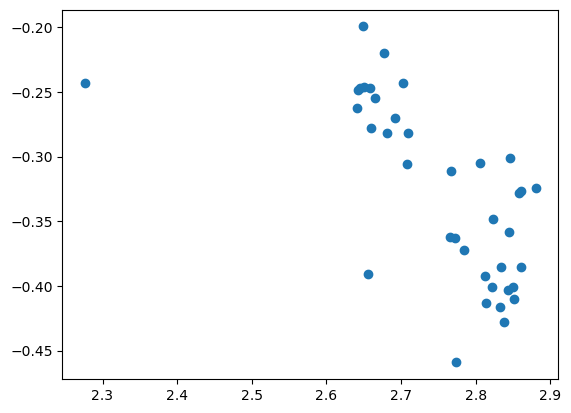

In [54]:
plt.scatter(p4.phi[0], p4.eta[0])

In [55]:
table.fields

['part_px',
 'part_py',
 'part_pz',
 'part_energy',
 'part_deta',
 'part_dphi',
 'part_d0val',
 'part_d0err',
 'part_dzval',
 'part_dzerr',
 'part_charge',
 'part_isChargedHadron',
 'part_isNeutralHadron',
 'part_isPhoton',
 'part_isElectron',
 'part_isMuon',
 'label_QCD',
 'label_Hbb',
 'label_Hcc',
 'label_Hgg',
 'label_H4q',
 'label_Hqql',
 'label_Zqq',
 'label_Wqq',
 'label_Tbqq',
 'label_Tbl',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_energy',
 'jet_nparticles',
 'jet_sdmass',
 'jet_tau1',
 'jet_tau2',
 'jet_tau3',
 'jet_tau4',
 'aux_genpart_eta',
 'aux_genpart_phi',
 'aux_genpart_pid',
 'aux_genpart_pt',
 'aux_truth_match',
 'labels']

In [56]:
def _pad(a, maxlen, value=0, dtype='float32'):
    if isinstance(a, np.ndarray) and a.ndim >= 2 and a.shape[1] == maxlen:
        return a
    elif isinstance(a, ak.Array):
        if a.ndim == 1:
            a = ak.unflatten(a, 1)
        a = ak.fill_none(ak.pad_none(a, maxlen, clip=True), value)
        return ak.values_astype(a, dtype)
    else:
        x = (np.ones((len(a), maxlen)) * value).astype(dtype)
        for idx, s in enumerate(a):
            if not len(s):
                continue
            trunc = s[:maxlen].astype(dtype)
            x[idx, :len(trunc)] = trunc
        return x

In [57]:
# Apply zero-padding and convert to a numpy array
array_test = _pad(p4.pt, maxlen=128).to_numpy()

In [58]:
array_test

array([[140.19296 ,  95.284584,  87.84807 , ...,   0.      ,   0.      ,
          0.      ],
       [244.67009 ,  62.332603,  45.159416, ...,   0.      ,   0.      ,
          0.      ],
       [143.15791 ,  91.48589 ,  25.372644, ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [157.69547 , 101.245445,  79.816284, ...,   0.      ,   0.      ,
          0.      ],
       [ 88.65814 ,  80.69194 ,  79.14036 , ...,   0.      ,   0.      ,
          0.      ],
       [171.13641 , 121.71926 ,  59.68036 , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [59]:
array_test.shape

(100000, 128)

# Constructing features and labels

As you see previously with `tree.show()`, there are four groups of arrays with different prefixes:
 - `part_*`: JaggedArrays with features for each particle in a jet. These (and features constrcuted from them) are what we use for training in the Particle Transformer paper.
 - `label_*`: 1D numpy arrays one-hot truth labels for each jet. These are the target of the training.
 - *[Not used in the Particle Transformer paper]* `jet_*`: 1D numpy array with (high-level) features for each jet. These can also be used in the training, but since they are constructed from the particle-level features, it is not expected that they bring additional performance improvement.
 - *[Not used in the Particle Transformer paper]* `aux_*`: auxiliary truth information about the simulated particles for additional studies / interpretations. **SHOULD NOT be used in the training of any classifier.**

The code below illustrates how the input features and labels are constructed in the Particle Transformer paper.

(See also the yaml configuration: https://github.com/jet-universe/particle_transformer/blob/main/data/JetClass/JetClass_full.yaml)

In [60]:
def _clip(a, a_min, a_max):
    try:
        return np.clip(a, a_min, a_max)
    except ValueError:
        return ak.unflatten(np.clip(ak.flatten(a), a_min, a_max), ak.num(a))

In [61]:
def build_features_and_labels(tree, transform_features=True):
    
    # load arrays from the tree
    a = tree.arrays(filter_name=['part_*', 'jet_pt', 'jet_energy', 'label_*'])

    # compute new features
    a['part_mask'] = ak.ones_like(a['part_energy'])
    a['part_pt'] = np.hypot(a['part_px'], a['part_py'])
    a['part_pt_log'] = np.log(a['part_pt'])
    a['part_e_log'] = np.log(a['part_energy'])
    a['part_logptrel'] = np.log(a['part_pt']/a['jet_pt'])
    a['part_logerel'] = np.log(a['part_energy']/a['jet_energy'])
    a['part_deltaR'] = np.hypot(a['part_deta'], a['part_dphi'])
    a['part_d0'] = np.tanh(a['part_d0val'])
    a['part_dz'] = np.tanh(a['part_dzval'])

    # apply standardization
    if transform_features:
        a['part_pt_log'] = (a['part_pt_log'] - 1.7) * 0.7
        a['part_e_log'] = (a['part_e_log'] - 2.0) * 0.7
        a['part_logptrel'] = (a['part_logptrel'] - (-4.7)) * 0.7
        a['part_logerel'] = (a['part_logerel'] - (-4.7)) * 0.7
        a['part_deltaR'] = (a['part_deltaR'] - 0.2) * 4.0
        a['part_d0err'] = _clip(a['part_d0err'], 0, 1)
        a['part_dzerr'] = _clip(a['part_dzerr'], 0, 1)

    feature_list = {
        'pf_points': ['part_deta', 'part_dphi'], # not used in ParT
        'pf_features': [
            'part_pt_log', 
            'part_e_log',
            'part_logptrel',
            'part_logerel',
            'part_deltaR',
            'part_charge',
            'part_isChargedHadron',
            'part_isNeutralHadron',
            'part_isPhoton',
            'part_isElectron',
            'part_isMuon',
            'part_d0',
            'part_d0err',
            'part_dz',
            'part_dzerr',
            'part_deta',
            'part_dphi',
        ],
        'pf_vectors': [
            'part_px',
            'part_py',
            'part_pz',
            'part_energy',
        ],
        'pf_mask': ['part_mask']
    }

    out = {}
    for k, names in feature_list.items():
        out[k] = np.stack([_pad(a[n], maxlen=128).to_numpy() for n in names], axis=1)

    label_list = ['label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl']
    out['label'] = np.stack([a[n].to_numpy().astype('int') for n in label_list], axis=1)
    
    return out

In [62]:
build_features_and_labels(tree)

{'pf_points': array([[[-0.07242048,  0.07607916,  0.08601749, ...,  0.        ,
           0.        ,  0.        ],
         [-0.08581114,  0.09253383,  0.06340456, ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.01535046, -0.00294232,  0.03290105, ...,  0.        ,
           0.        ,  0.        ],
         [-0.04896092, -0.04723394, -0.06385756, ...,  0.        ,
           0.        ,  0.        ]],
 
        [[-0.13630104, -0.14928365, -0.17035806, ...,  0.        ,
           0.        ,  0.        ],
         [-0.01668766, -0.02666983, -0.01680285, ...,  0.        ,
           0.        ,  0.        ]],
 
        ...,
 
        [[ 0.07362503,  0.09081   , -0.15697095, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.01177871,  0.02063447, -0.01410705, ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.03936064,  0.04921722,  0.03772318, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.04601908,  

In [63]:
build_features_and_labels(tree)['label'].shape

(100000, 10)

In [64]:
build_features_and_labels(tree)['pf_features'].shape

(100000, 17, 128)

In [65]:
build_features_and_labels(tree)['pf_mask'].shape


(100000, 1, 128)

In [66]:
features_and_labels = build_features_and_labels(tree)

In [67]:
type(features_and_labels)

dict

In [68]:
features_and_labels.keys()

dict_keys(['pf_points', 'pf_features', 'pf_vectors', 'pf_mask', 'label'])

In [69]:
features_and_labels['pf_features'].shape

(100000, 17, 128)

### Create features and vectors metadata

In [70]:
feature_list = {
        'pf_points': ['part_deta', 'part_dphi'], # not used in ParT
        'pf_features': [
            'part_pt_log', 
            'part_e_log',
            'part_logptrel',
            'part_logerel',
            'part_deltaR',
            'part_charge',
            'part_isChargedHadron',
            'part_isNeutralHadron',
            'part_isPhoton',
            'part_isElectron',
            'part_isMuon',
            'part_d0',
            'part_d0err',
            'part_dz',
            'part_dzerr',
            'part_deta',
            'part_dphi',
        ],
        'pf_vectors': [
            'part_px',
            'part_py',
            'part_pz',
            'part_energy',
        ],
        'pf_mask': ['part_mask']
    }

In [71]:
len(feature_list['pf_features'])

17

In [72]:
features_metadata_index = {}

for i, feat in enumerate(feature_list['pf_features']):
    features_metadata_index[feat] = i

features_metadata_index

{'part_pt_log': 0,
 'part_e_log': 1,
 'part_logptrel': 2,
 'part_logerel': 3,
 'part_deltaR': 4,
 'part_charge': 5,
 'part_isChargedHadron': 6,
 'part_isNeutralHadron': 7,
 'part_isPhoton': 8,
 'part_isElectron': 9,
 'part_isMuon': 10,
 'part_d0': 11,
 'part_d0err': 12,
 'part_dz': 13,
 'part_dzerr': 14,
 'part_deta': 15,
 'part_dphi': 16}

In [73]:
vectors_metadata_index = {}

for i, feat in enumerate(feature_list['pf_vectors']):
    vectors_metadata_index[feat] = i

vectors_metadata_index

{'part_px': 0, 'part_py': 1, 'part_pz': 2, 'part_energy': 3}

### Plot jets

In [81]:
def plot_jets(input_jet_label):

    mask = table['labels'] == input_jet_label

    # Crear un gráfico
    plt.figure()

    # Obtener las características y etiquetas
    features = build_features_and_labels(tree)['pf_features'][mask][0] ### Este [0] es porque se eligió el jet 0 de cada tipo para graficar

    energy = build_features_and_labels(tree)['pf_vectors'][mask][0][-1]

    x_np = features[-2]  # delta eta
    y_np = features[-1]  # delta phi
    sizes = energy  # Tamaños
    fills = features[5]  # Relleno. solid for electrically charged particles, hollow for neutral particles

    isChargedHadron = features[6]
    isNeutralHadron = features[7]
    isPhoton = features[8]
    isElectron = features[9]
    isMuon = features[10]
    trajec_disp = features[11]  # Trajectory displacement These measurements are only available for electrically charged particles, and a value of 0 is used for neutral particles.

    # Normalizar trajec_disp para que esté en el rango [0, 1]
    norm = colors.Normalize(vmin=min(trajec_disp), vmax=max(trajec_disp))
    green_colors = plt.cm.Greens(norm(trajec_disp))  # Escala de verde

    # Diccionario para los tipos de partículas y sus propiedades de graficación
    particle_types = {
        'is_hadron': {'condition': lambda i: isChargedHadron[i] == 1 or isNeutralHadron[i] == 1, 'marker': 'o', 'label_added': False},
        'is_photon': {'condition': lambda i: isPhoton[i] == 1, 'marker': 'p', 'label_added': False},
        'is_electron': {'condition': lambda i: isElectron[i] == 1, 'marker': '^', 'label_added': False},
        'is_muon': {'condition': lambda i: isMuon[i] == 1, 'marker': 'v', 'label_added': False},
        'is_bg': {'condition': lambda i: True, 'marker': 's', 'label_added': False}
    }

    # Graficar puntos con símbolos diferentes según su clasificación
    for i in range(len(x_np)):
        for label, props in particle_types.items():
            if props['condition'](i):
                plt.scatter(
                    x_np[i], y_np[i], 
                    s=sizes[i], 
                    marker=props['marker'], 
                    label=label if not props['label_added'] else "",  # Solo añade la etiqueta si no ha sido añadida
                    facecolors='none' if fills[i] == 0 else green_colors[i], 
                    edgecolors=green_colors[i]
                )
                props['label_added'] = True  # Marca la etiqueta como añadida
                break

    # Añadir leyenda
    #plt.legend()

    # Añadir títulos y etiquetas
    plt.title('{}'.format(input_jet_label))
    plt.xlabel(r'$\Delta \eta$')  # Delta eta
    plt.ylabel(r'$\Delta \phi$')  # Delta phi
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.5,0.5)

    # Mostrar gráfico
    plt.show()

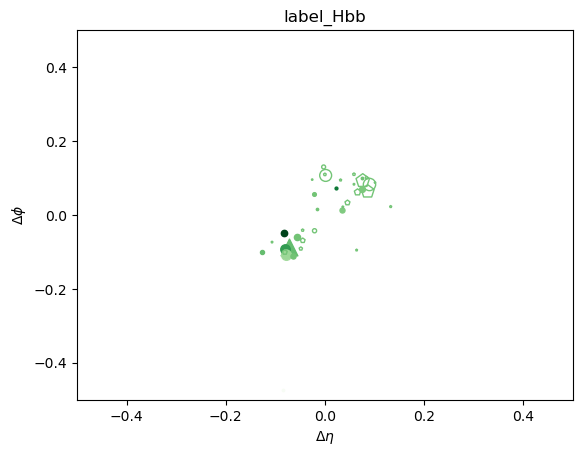

In [82]:
plot_jets('label_Hbb')

label_QCD


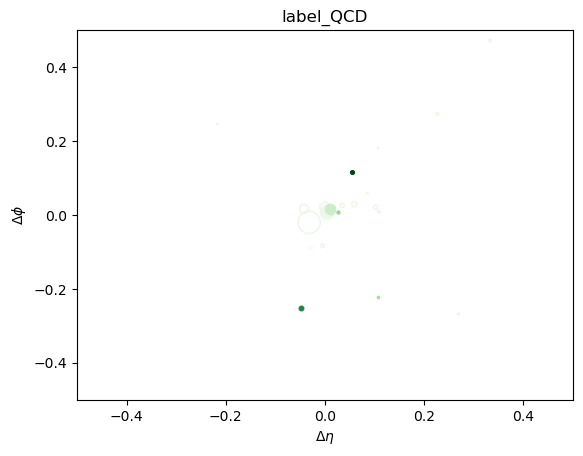

label_Hbb


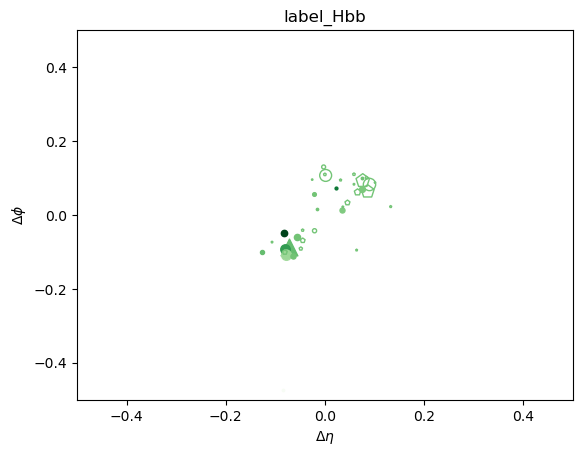

label_Hcc


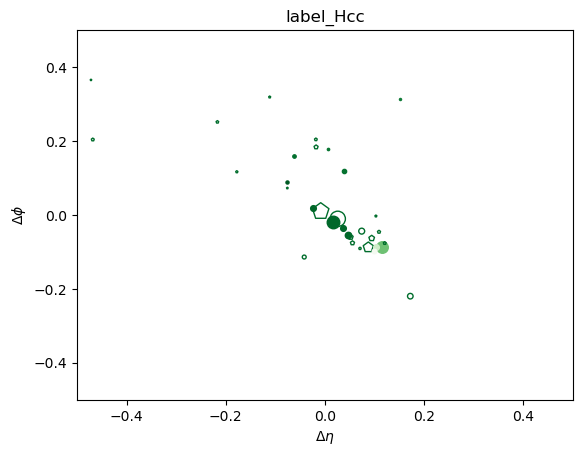

label_Hgg


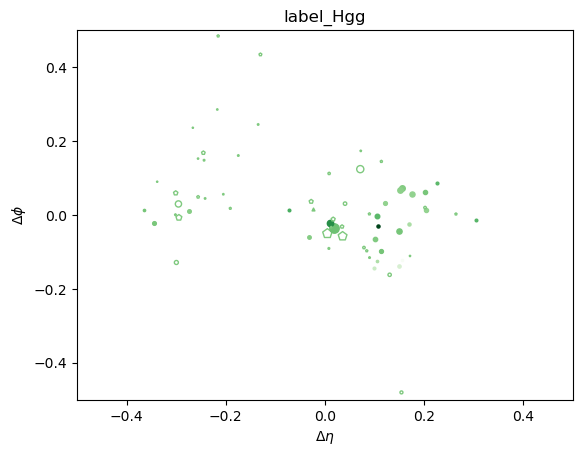

label_H4q


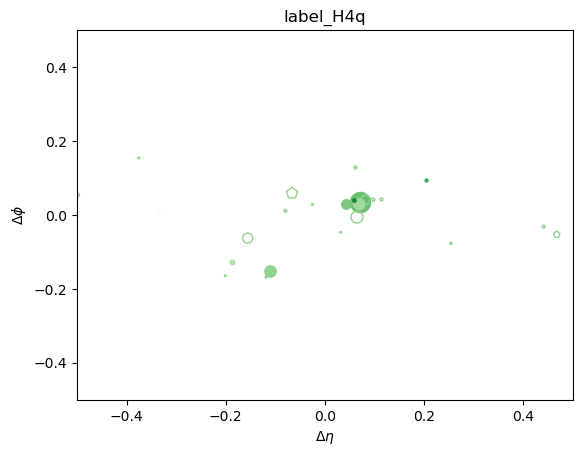

label_Hqql


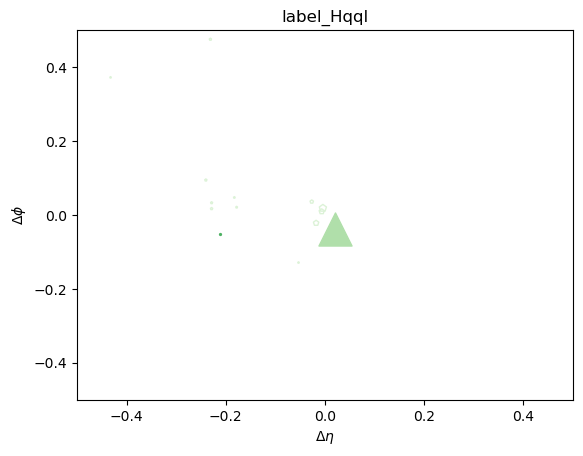

label_Zqq


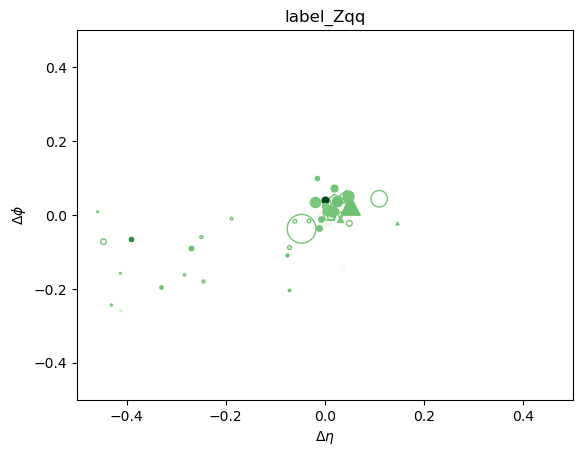

label_Wqq


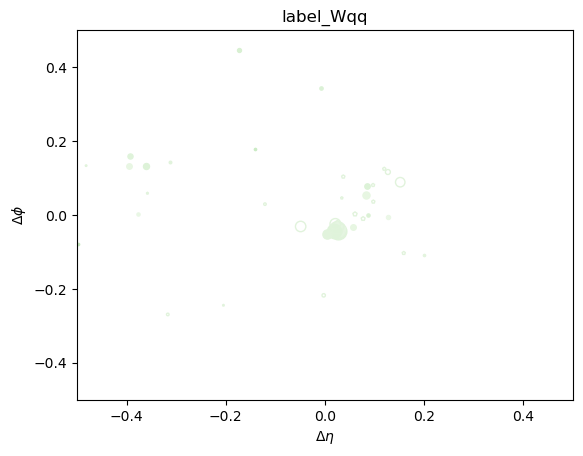

label_Tbqq


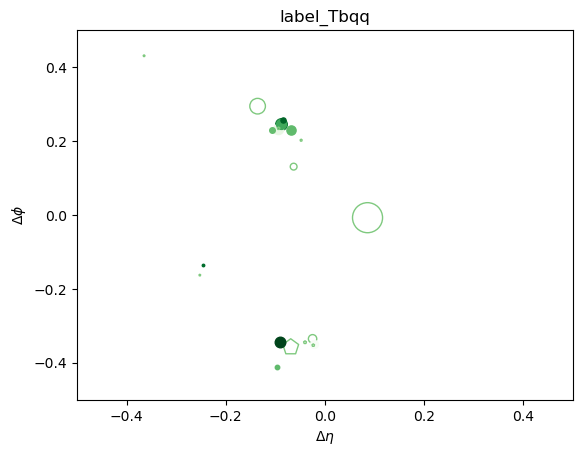

label_Tbl


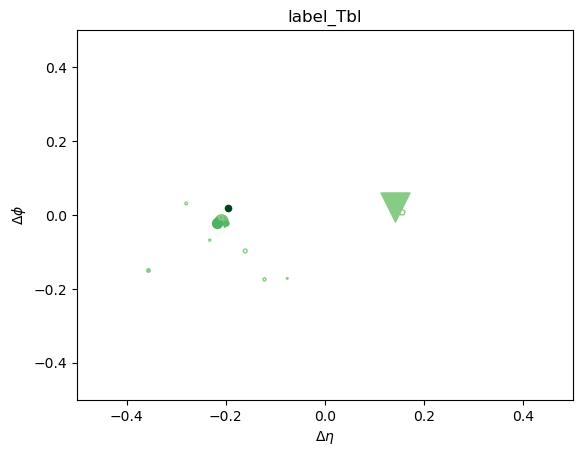

In [83]:
label_list = ['label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl']

for i in range(len(label_list)):
    print(label_list[i])
    plot_jets(label_list[i])
    plt.show()